In [1]:
import csv as csv
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv("./emnist/emnist-letters-train.csv",header=0)
test_df = pd.read_csv("./emnist/emnist-letters-test.csv",header=0)

In [3]:
train_data = train_df.values
test_data = test_df.values

X_train = train_data[0::,1::]
y_train = train_data[0::,0]

X_test = test_data[0::,1::]
y_test = test_data[0::,0]

In [4]:
param_grid = {"hidden_layer_sizes":[(80,70,60,50,40,30,20), (100,85,70,55,40,25), (100,80,60,40,20),(50,40,30,20,10)]}
clf = GridSearchCV(MLPClassifier(early_stopping = True), param_grid)
#clf = MLPClassifier(hidden_layer_sizes=(52,52,52,52,52,52,52), early_stopping = True)
clf.fit(X_train, y_train)
neural_output = clf.predict(X_test)
print(accuracy_score(y_test, neural_output))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

0.8566119332387323
Best estimator found by grid search:
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(80, 70, 60, 50, 40, 30, 20),
       learning_rate='constant', learning_rate_init=0.001, max_iter=200,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [5]:
from scipy import stats
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, neural_output))

             precision    recall  f1-score   support

          1       0.83      0.82      0.82       799
          2       0.93      0.87      0.90       800
          3       0.92      0.92      0.92       800
          4       0.89      0.89      0.89       800
          5       0.94      0.89      0.91       800
          6       0.94      0.90      0.92       800
          7       0.80      0.71      0.75       800
          8       0.89      0.83      0.86       800
          9       0.71      0.76      0.73       800
         10       0.96      0.83      0.89       800
         11       0.93      0.89      0.91       800
         12       0.74      0.71      0.73       800
         13       0.94      0.96      0.95       800
         14       0.89      0.85      0.87       800
         15       0.92      0.95      0.94       800
         16       0.92      0.95      0.93       800
         17       0.73      0.79      0.76       800
         18       0.93      0.83      0.88   

/usr/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


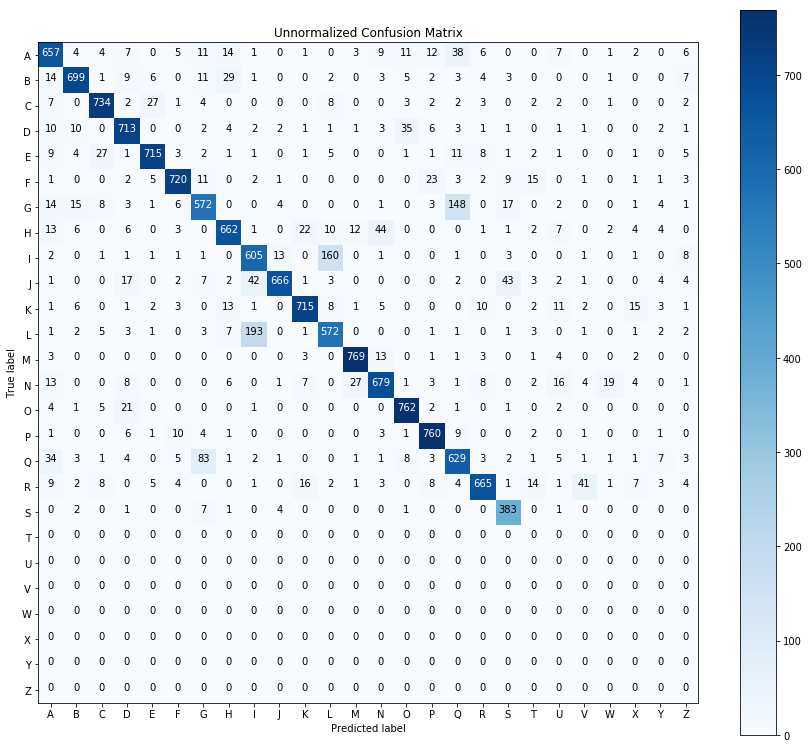

In [6]:
import matplotlib.pyplot as plt
import itertools

# code from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
cm = confusion_matrix(y_test, neural_output)
plt.figure(figsize=(12,10.5))
plt.imshow(cm, cmap = plt.cm.Blues)
plt.colorbar()

classes = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Unnormalized Confusion Matrix')
#plt.savefig("cmNN.png")
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.learning_curve import learning_curve

#code from http://scikit-learn.org/stable/modules/learning_curve.html

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlim([0,60000])
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [ ]:
title = "Learning Curves (MLP Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=100, test_size=0.2, random_state=0)

estimator = MLPClassifier(hidden_layer_sizes=(80, 70, 60, 50, 40, 30, 20), early_stopping = True)
plot_learning_curve(estimator, title, X_train, y_train, ylim =[0,1], n_jobs=4)

plt.show()